In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import imblearn

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df1 = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2021.csv')
df2 = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2021.csv')
df3 = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2021.csv')

In [ ]:
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [ ]:
df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,0,11,5.0,7.0
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,3.0


In [ ]:
df3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [ ]:
# normalize 3x class into binary and rename to 'Diabetes_binary'
df1['Diabetes_012'] = df1['Diabetes_012'].replace({1: 1, 2: 1, 0: 0})
df1.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)

In [ ]:
# Combine all 3 datasets
df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [ ]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,unique,count
Diabetes_binary,float64,0,0.000000,2,539892
HighBP,int64,0,0.000000,2,539892
HighChol,float64,0,0.000000,2,539892
CholCheck,int64,0,0.000000,2,539892
BMI,float64,0,0.000000,84,539892
Smoker,float64,0,0.000000,2,539892
Stroke,float64,0,0.000000,2,539892
HeartDiseaseorAttack,float64,0,0.000000,2,539892
PhysActivity,int64,0,0.000000,2,539892
Fruits,int64,0,0.000000,2,539892


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,539892.0,0.196934,0.397682,0.0,0.0,0.0,0.0,1.0
HighBP,539892.0,0.434694,0.495717,0.0,0.0,0.0,1.0,1.0
HighChol,539892.0,0.414268,0.492596,0.0,0.0,0.0,1.0,1.0
CholCheck,539892.0,0.964949,0.183910,0.0,1.0,1.0,1.0,1.0
BMI,539892.0,29.119557,6.636712,12.0,25.0,28.0,32.0,99.0
Smoker,539892.0,0.415498,0.492808,0.0,0.0,0.0,1.0,1.0
Stroke,539892.0,0.041382,0.199173,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,539892.0,0.092776,0.290118,0.0,0.0,0.0,0.0,1.0
PhysActivity,539892.0,0.771525,0.419851,0.0,1.0,1.0,1.0,1.0
Fruits,539892.0,0.619352,0.485547,0.0,0.0,1.0,1.0,1.0


In [ ]:
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


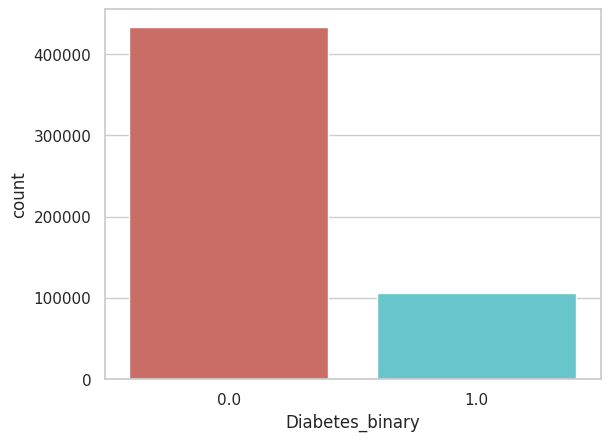

Diabetes_binary
0.0    433569
1.0    106323
Name: count, dtype: int64
Diabetes_binary
0.0    0.803066
1.0    0.196934
Name: proportion, dtype: float64


In [ ]:
# plot the values of the target variable
sns.countplot(x='Diabetes_binary', data=df, palette='hls')
plt.show()
# get the count of the target variable
print(df['Diabetes_binary'].value_counts())
print(df['Diabetes_binary'].value_counts(normalize=True))

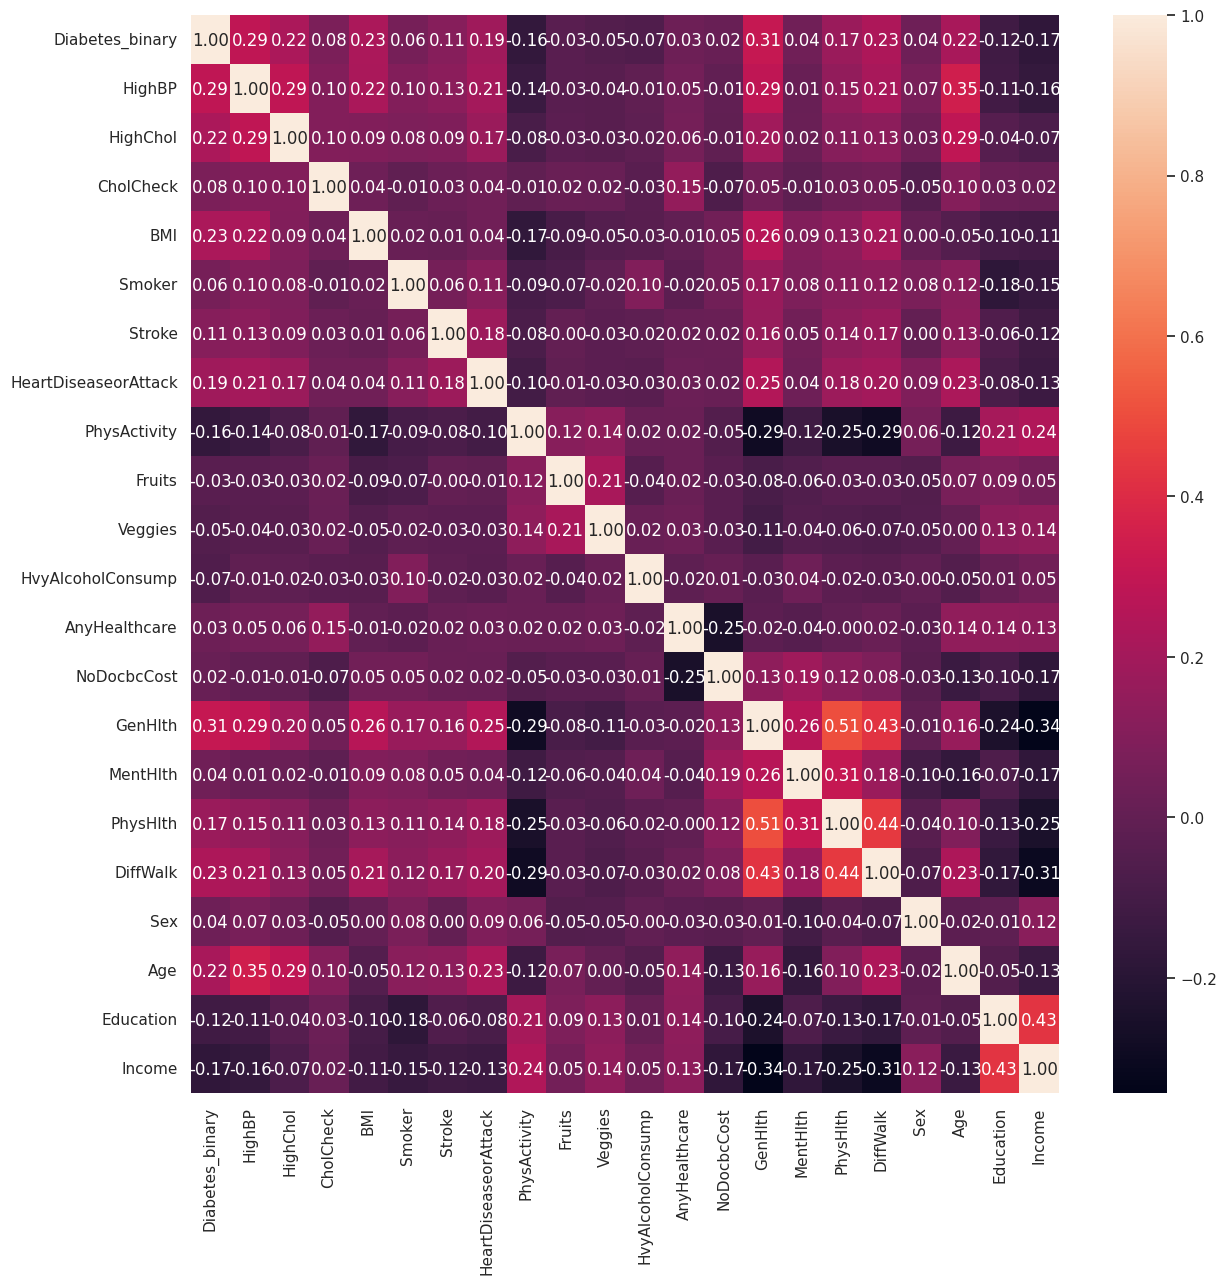

In [ ]:
# plot correlation matrix
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
def plot_loss_accuracy(history, learning_rate, regularization_param):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], label='Training loss')  # Add 1 to x values
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], label='Validation loss')  # Add 1 to x values
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.text(0.05, 0.95, f'Learning rate: {learning_rate}\nRegularization: {regularization_param}', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], label='Training accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.text(0.05, 0.95, f'Learning rate: {learning_rate}\nRegularization: {regularization_param}', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

In [ ]:
# train valid split
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.1, random_state=42)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

(485902, 21) (485902,) (53990, 21) (53990,)


In [ ]:
# randomly oversample the data
def random_oversampler(X_train, y_train):
    ros = imblearn.over_sampling.RandomOverSampler(random_state=42)
    X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)
    return X_oversampled, y_oversampled

In [ ]:
def get_classification_report(y_pred_raw, y_valid, threshold=0.5):
    y_pred = np.where(y_pred_raw >= threshold, 1, 0)
    print(classification_report(y_valid, y_pred))
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

In [ ]:
def build_model(X_train, y_train, X_valid, y_valid,lr=0.001, regularize=0, epochs=20, batch_size=128, callback=[], verbose=1, class_weights=None, threshold=0.5):
    tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential()
    reg = tf.keras.regularizers.l2(regularize)
    # initializer = tf.keras.initializers.HeNormal(seed=42)
    model.add(tfl.Dense(9, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=reg))
    model.add(tfl.Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'],)
    if class_weights == None:
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose = verbose, callbacks=callback)
    else:
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose = verbose, callbacks=callback, class_weight=class_weights)
    print(model.evaluate(X_valid, y_valid))
    plot_loss_accuracy(history, lr, regularize)
    y_pred_raw = model.predict(X_valid)
    get_classification_report(y_pred_raw, y_valid, threshold)
    return history, model

In [ ]:
X_oversampled, y_oversampled = random_oversampler(X_train, y_train)

Epoch 1/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5098 - loss: 0.7678 - val_accuracy: 0.6767 - val_loss: 0.5998
Epoch 2/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7050 - loss: 0.5717 - val_accuracy: 0.7023 - val_loss: 0.5513
Epoch 3/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7289 - loss: 0.5402 - val_accuracy: 0.7044 - val_loss: 0.5405
Epoch 4/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7330 - loss: 0.5317 - val_accuracy: 0.7059 - val_loss: 0.5378
Epoch 5/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7359 - loss: 0.5288 - val_accuracy: 0.7081 - val_loss: 0.5329
Epoch 6/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7379 - loss: 0.5254 - val_accuracy: 0.7068 - val_loss: 0.5339
Epoch 7/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7392 - loss: 0.5234 - val_accuracy: 0.7081 - val_loss: 0.5322
Epoch 8/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7398 - loss: 0.5224 - val_accuracy: 0.

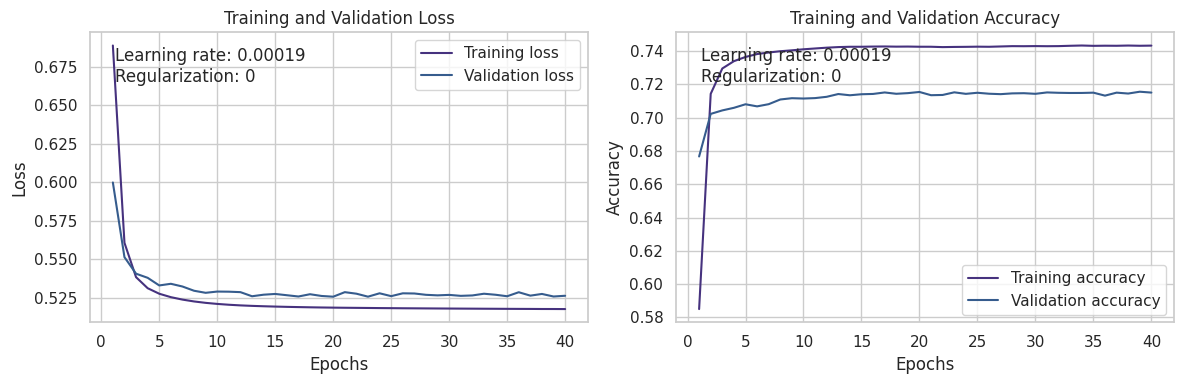

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80     43398
         1.0       0.39      0.79      0.52     10592

    accuracy                           0.72     53990
   macro avg       0.66      0.74      0.66     53990
weighted avg       0.82      0.72      0.74     53990



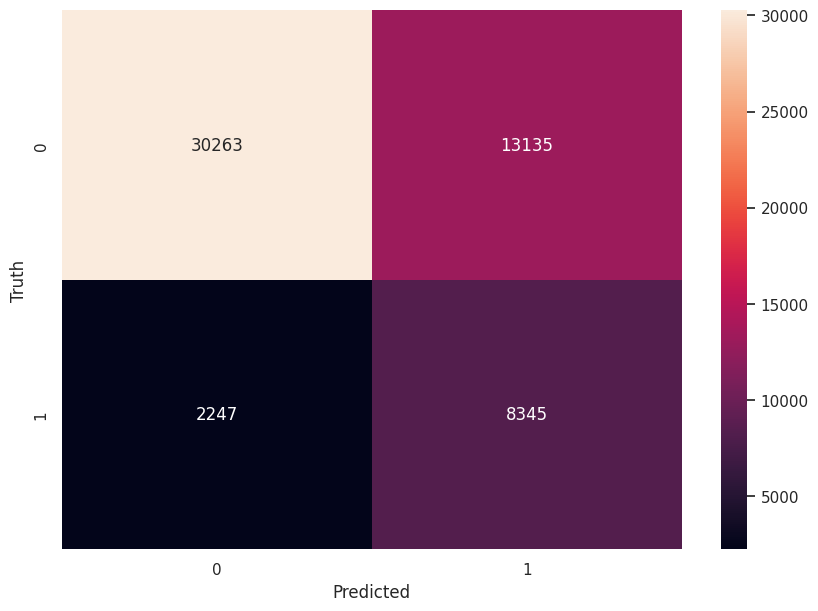

In [ ]:
history_oversamped, model_oversampled = build_model(X_oversampled, y_oversampled, X_valid, y_valid, lr=0.00019, regularize=0, epochs=40, batch_size=1024)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix

best_accuracy = 0  # Variable to store the highest accuracy
best_model_filename = ''  # Variable to store the best model's filename

i = [3, 4, 5, 6]
j = [3, 4, 5, 6]

# Oversample training data
X_oversampled, y_oversampled = random_oversampler(X_train, y_train)

# Loop through combinations of hidden layers
for a in i:
    for b in j:
        # Initializing the ANN
        classifier = Sequential()

        # Adding the input layer and the first hidden layer
        classifier.add(Dense(activation="relu", input_dim=X_oversampled.shape[1], units=a, kernel_initializer="uniform"))

        # Adding the second hidden layer
        classifier.add(Dense(units=b, kernel_initializer='uniform', activation="relu"))

        # Adding the output layer
        classifier.add(Dense(units=1, kernel_initializer='uniform', activation="sigmoid"))

        # Compiling the ANN
        classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

        # Fitting the ANN to the training set
        print(f"Training model with {a} units in first hidden layer and {b} units in second hidden layer.")
        history = classifier.fit(X_oversampled, y_oversampled, batch_size=64, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

        # Making predictions on the validation set
        y_pred_raw = classifier.predict(X_valid)

        # Thresholding predictions to get binary results
        y_pred = (y_pred_raw > 0.5)

        # Calculating the confusion matrix and accuracy
        cm = confusion_matrix(y_valid, y_pred)
        accuracy = (cm[0, 0] + cm[1, 1]) / (cm.sum())

        # If the current model's accuracy is higher than the best accuracy, save the model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_filename = f"best_model_a{a}_b{b}.h5"
            classifier.save(best_model_filename)
            print(f"New best model with {a} and {b} units saved as {best_model_filename} with accuracy {accuracy}")

print(f"Best model saved as {best_model_filename} with accuracy {best_accuracy}")

Training model with 3 units in first hidden layer and 3 units in second hidden layer.
Epoch 1/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.7319 - loss: 0.5402 - val_accuracy: 0.7073 - val_loss: 0.5345
Epoch 2/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.7391 - loss: 0.5227 - val_accuracy: 0.7114 - val_loss: 0.5282
Epoch 3/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7408 - loss: 0.5216 - val_accuracy: 0.7108 - val_loss: 0.5250
Epoch 4/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.7407 - loss: 0.5205 - val_accuracy: 0.7101 - val_loss: 0.5275
Epoch 5/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7397 - loss: 0.5211 - val_accuracy: 0.7054 - val_loss: 0.5332
Epoch 6/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7406 - loss: 0.5204 - val_accuracy: 0.7100 - val_loss: 0.5270
Epoch 7/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7399 - loss: 0.5213 - val_accuracy: 0.7110 - 

New best model with 3 and 3 units saved as best_model_a3_b3.h5 with accuracy 0.7042044823115392
Training model with 3 units in first hidden layer and 4 units in second hidden layer.
Epoch 1/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7321 - loss: 0.5578 - val_accuracy: 0.7035 - val_loss: 0.5512
Epoch 2/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7405 - loss: 0.5242 - val_accuracy: 0.7233 - val_loss: 0.5260
Epoch 3/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.7408 - loss: 0.5239 - val_accuracy: 0.7278 - val_loss: 0.5203
Epoch 4/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7400 - loss: 0.5243 - val_accuracy: 0.7114 - val_loss: 0.5450
Epoch 5/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.7403 - loss: 0.5234 - val_accuracy: 0.7228 - val_loss: 0.5250
Epoch 6/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7409 - loss: 0.5230 - val_accuracy: 0.7199 - val_loss: 0.5330
Epoch 7/10
12193/121

New best model with 3 and 4 units saved as best_model_a3_b4.h5 with accuracy 0.7192998703463604
Training model with 3 units in first hidden layer and 5 units in second hidden layer.
Epoch 1/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7267 - loss: 0.5480 - val_accuracy: 0.7099 - val_loss: 0.5330
Epoch 2/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7413 - loss: 0.5219 - val_accuracy: 0.7173 - val_loss: 0.5246
Epoch 3/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.7423 - loss: 0.5210 - val_accuracy: 0.7097 - val_loss: 0.5380
Epoch 4/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7421 - loss: 0.5207 - val_accuracy: 0.7167 - val_loss: 0.5292
Epoch 5/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7422 - loss: 0.5203 - val_accuracy: 0.7164 - val_loss: 0.5288
Epoch 6/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7430 - loss: 0.5190 - val_accuracy: 0.7186 - val_loss: 0.5248
Epoch 7/10
12193/121

New best model with 4 and 5 units saved as best_model_a4_b5.h5 with accuracy 0.7251528060751992
Training model with 4 units in first hidden layer and 6 units in second hidden layer.
Epoch 1/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.7295 - loss: 0.5372 - val_accuracy: 0.7126 - val_loss: 0.5244
Epoch 2/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7411 - loss: 0.5202 - val_accuracy: 0.7072 - val_loss: 0.5335
Epoch 3/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7413 - loss: 0.5195 - val_accuracy: 0.7021 - val_loss: 0.5417
Epoch 4/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7423 - loss: 0.5188 - val_accuracy: 0.7083 - val_loss: 0.5382
Epoch 5/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.7413 - loss: 0.5197 - val_accuracy: 0.7110 - val_loss: 0.5291
Epoch 6/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7413 - loss: 0.5193 - val_accuracy: 0.7115 - val_loss: 0.5276
Epoch 7/10
12193/121

New best model with 6 and 3 units saved as best_model_a6_b3.h5 with accuracy 0.7281348397851454
Training model with 6 units in first hidden layer and 4 units in second hidden layer.
Epoch 1/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7310 - loss: 0.5568 - val_accuracy: 0.7231 - val_loss: 0.5306
Epoch 2/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7406 - loss: 0.5238 - val_accuracy: 0.7230 - val_loss: 0.5301
Epoch 3/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7405 - loss: 0.5232 - val_accuracy: 0.7241 - val_loss: 0.5292
Epoch 4/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7417 - loss: 0.5211 - val_accuracy: 0.7262 - val_loss: 0.5276
Epoch 5/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.7410 - loss: 0.5216 - val_accuracy: 0.7140 - val_loss: 0.5484
Epoch 6/10
12193/12193 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7411 - loss: 0.5217 - val_accuracy: 0.7216 - val_loss: 0.5344
Epoch 7/10
12193/121